In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import glob
import os

# Prepare Dataset

In [2]:
class_names = ['cat','dog']

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_set = train_datagen.flow_from_directory("./dogs vs cats/training_set",
                                          class_mode = "categorical",
                                          batch_size = 32,
                                          target_size = (192, 192))

valid_datagen = ImageDataGenerator(rescale=1. / 255)
val_set = valid_datagen.flow_from_directory("./dogs vs cats/test_set",
                                            batch_size = 32,
                                            class_mode = "categorical",
                                            target_size = (192, 192))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Inspect Data

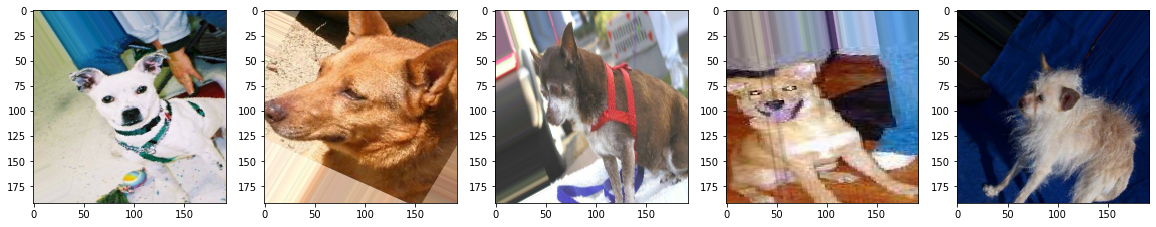

In [3]:
plt.figure(figsize = (20,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_set[0][0][i])
plt.show()

# Load Pretrained Model

In [4]:
backbone = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3),
                                             include_top=False,
                                             weights='imagenet')
backbone.trainable = False

# Build the Model

In [5]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes)
])

# 也可以这么写
# x = keras.layers.GlobalAveragePooling2D()(backbone.output)
# outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
# model = tf.keras.Model(inputs=backbone.input, outputs=outputs)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


# Train the Model

In [6]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [7]:
epochs = 20
history = model.fit(train_set,validation_data = val_set,epochs = epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/20
250/250 [==============================] - 174s 697ms/step - loss: 0.2645 - accuracy: 0.8829 - val_loss: 0.1703 - val_accuracy: 0.9345
Epoch 2/20
250/250 [==============================] - 180s 719ms/step - loss: 0.1887 - accuracy: 0.9206 - val_loss: 0.1161 - val_accuracy: 0.9575
Epoch 3/20
250/250 [==============================] - 170s 680ms/step - loss: 0.1737 - accuracy: 0.9283 - val_loss: 0.1932 - val_accuracy: 0.9340
Epoch 4/20
250/250 [==============================] - 168s 674ms/step - loss: 0.1770 - accuracy: 0.9269 - val_loss: 0.1610 - val_accuracy: 0.9450
Epoch 5/20
250/250 [==============================] - 168s 672ms/step - loss: 0.1776 - accuracy: 0.9237 - val_loss: 0.1052 - val_accuracy: 0.9610
Epoch 6/20
250/250 [==============================] - 168s 672ms/step - loss: 0.1706 - accuracy: 0.9319 - val_loss: 0.1391 - val_accuracy: 0.9500
Epoch 7/20
250/250 [===========

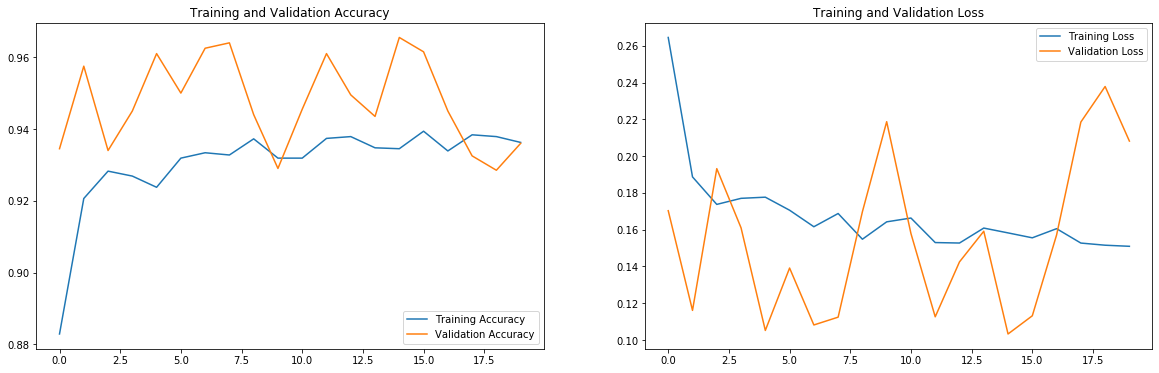

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label = "Training Accuracy")
plt.plot(range(epochs),val_acc,label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label = "Training Loss")
plt.plot(range(epochs),val_loss,label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [9]:
predictions = [np.argmax(i) for i in model.predict(val_set[0])]
#predictions = [class_names[np.argmax(i)] for i in model.predict(val_set[0])]

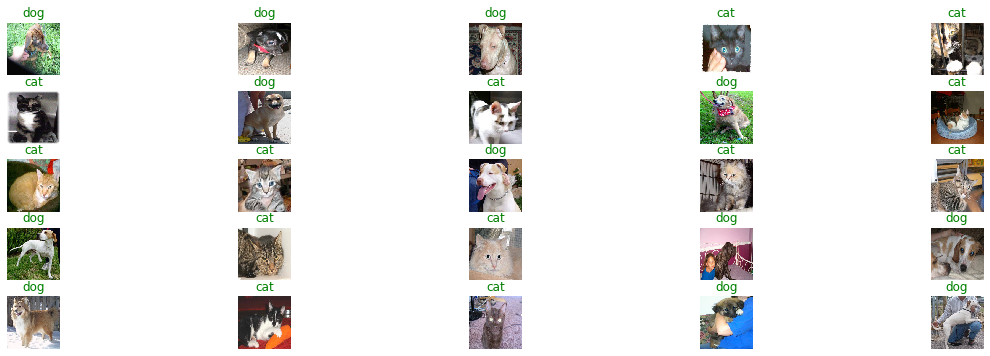

In [19]:

plt.figure(figsize = (20,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(val_set[0][0][i])
    if(predictions[i] == np.argmax(val_set[0][1][i])):
        plt.title(class_names[predictions[i]],color='g')
    else:
        plt.title(class_names[predictions[i]],color='r')
    plt.axis('off')
plt.show()